In [123]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as plticker
import seaborn as sns

In [124]:
df = pd.read_csv('pricetest.csv')

CLEANUP

In [125]:
df.dtypes

Unnamed: 0        int64
cardName         object
cardCmc          object
cardType         object
creatureType     object
powTough         object
set              object
setNum           object
rarity           object
language         object
cardImage        object
price           float64
dtype: object

In [126]:
df.cardCmc = df.cardCmc.str.replace("{", "", regex=False)
df.cardCmc = df.cardCmc.str.replace("}", "", regex=False)
df.cardCmc = df.cardCmc.str.replace("[", "", regex=False)
df.cardCmc = df.cardCmc.str.replace("]", "", regex=False)
df.cardCmc = df.cardCmc.str.replace("'", "", regex=False)
df.cardCmc = df.cardCmc.str.replace(" ", "", regex=False)


In [127]:
df["colorlessValue"] = df["cardCmc"].str.extract('^(\d*)')
df["pipValue"] = df["cardCmc"].str.count('(\D)')
df['pipValue'] = df['pipValue'].fillna(0)
df['colorlessValue'] = df['colorlessValue'].fillna(0)
df.colorlessValue = df.colorlessValue.replace("", 0)
df.pipValue = df.pipValue.replace("", 0)
df["colorlessValue"] = df["colorlessValue"].astype(int)
df["pipValue"] = df["pipValue"].astype(int)
df["manaValue"] = df["pipValue"] + df["colorlessValue"]



In [128]:
pipColors1 = df["cardCmc"].str.replace('X', '')
pipColors = pipColors1.str.extract('(\D)')
df["color"] = pipColors
df.color = df.color.fillna("C")

In [129]:
df.price = df.price.fillna(0)

In [130]:
df["setNum"] = df["setNum"].str.extract('^(\d*)')
df["setNum"] = df["setNum"].fillna(0)
df["setNum"] = df["setNum"].replace("#", "")
df["setNum"] = df["setNum"].replace('', 0)
df["setNum"] = df["setNum"].astype(int)
df.setNum

0       0
1       0
2       0
3       0
4       0
       ..
6502    0
6503    0
6504    0
6505    0
6506    0
Name: setNum, Length: 6507, dtype: int64

In [131]:
df.head(6079)

,Unnamed: 0,cardName,cardCmc,cardType,creatureType,powTough,set,setNum,rarity,language,cardImage,price,colorlessValue,pipValue,manaValue,color
0,0,Angel of Serenity,4WWW,Creature,Angel,5/6,Return to Ravnica (RTR),0,Mythic Rare,English,https://c1.scryfall.com/file/scryfall-cards/la...,1.81,4,3,7,W
1,1,Armory Guard,3W,Creature,Giant Soldier,2/5,Return to Ravnica (RTR),0,Common,English,https://c1.scryfall.com/file/scryfall-cards/la...,0.02,3,1,4,W
2,2,Arrest,2W,Enchantment,NaN,NaN,Return to Ravnica (RTR),0,Uncommon,English,https://c1.scryfall.com/file/scryfall-cards/la...,0.09,2,1,3,W
3,3,Avenging Arrow,2W,Instant,NaN,NaN,Return to Ravnica (RTR),0,Common,English,https://c1.scryfall.com/file/scryfall-cards/la...,0.06,2,1,3,W
4,4,Azorius Arrester,1W,Creature,Human Soldier,2/1,Return to Ravnica (RTR),0,Common,English,https://c1.scryfall.com/file/scryfall-cards/la...,0.10,1,1,2,W
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6074,6074,Scorch Rider,3R,Creature,Human Warrior,4/3,Zendikar Rising (ZNR),0,Common,English,https://c1.scryfall.com/file/scryfall-cards/la...,0.01,3,1,4,R
6075,6075,Shatterskull Charger,1RR,Creature,Giant Warrior,4/3,Zendikar Rising (ZNR),0,Rare,English,https://c1.scryfall.com/file/scryfall-cards/la...,0.13,1,2,3,R
6076,6076,Shatterskull Minotaur,4RR,Creature,Minotaur Warrior,5/4,Zendikar Rising (ZNR),0,Uncommon,English,https://c1.scryfall.com/file/scryfall-cards/la...,0.01,4,2,6,R
6077,6077,"['Shatterskull Smashing', 'Shatterskull, the H...",XRR,Sorcery,NaN,NaN,Zendikar Rising (ZNR),0,Mythic Rare,English,['https://c1.scryfall.com/file/scryfall-cards/...,3.91,0,3,3,R


QUESTIONS AND VISUALIZATIONS

Do red or green cards sell for more on average?

In [132]:
green = df[df.color == "G"]
red = df[df.color == "R"]

print(green.price.mean())
print(red.price.mean())

0.8410579576816907
0.5973056057866157


Plot each color and the average prices of them.

<AxesSubplot:xlabel='color', ylabel='price'>

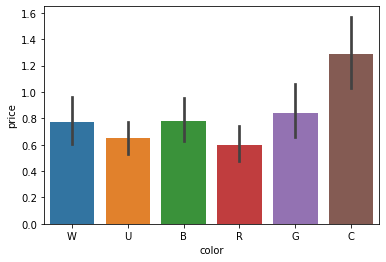

In [133]:
sns.barplot(x=df.color, y = df.price)

Do cards with mana value 5 or greater sell for more than cards with less than mana value 5 on average?

In [134]:
expensive = df[df.manaValue >= 5]
cheap = df[df.manaValue < 5]

print(expensive.price.mean(), "is the average price of cards with mana value 5 or greater")
print(cheap.price.mean(), "is the average price of cards with mana value less than 5")

1.3313501805054084 is the average price of cards with mana value 5 or greater
0.6680925419757987 is the average price of cards with mana value less than 5


Plot each mana value and the average prices of them.

<AxesSubplot:xlabel='manaValue', ylabel='price'>

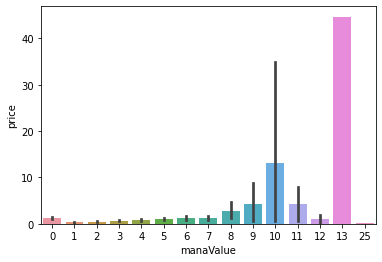

In [135]:
sns.barplot(x=df.manaValue, y = df.price)

Plot each mana value that is less than 9 and the average prices of them.

<AxesSubplot:xlabel='manaValue', ylabel='price'>

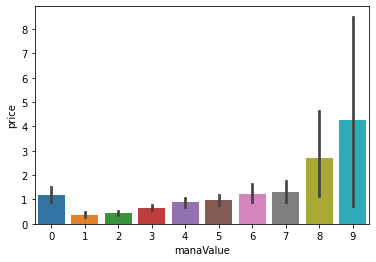

In [136]:
lesseight = df[df.manaValue <= 9]
sns.barplot(x=lesseight.manaValue, y = lesseight.price)

Of cards with mana value of 10, what are their prices?

In [137]:
ten = df[df.manaValue == 10]
ten

,Unnamed: 0,cardName,cardCmc,cardType,creatureType,powTough,set,setNum,rarity,language,cardImage,price,colorlessValue,pipValue,manaValue,color
1118,1118,Dead Drop,9B,Sorcery,NaN,NaN,Khans of Tarkir (KTK),0,Uncommon,English,https://c1.scryfall.com/file/scryfall-cards/la...,0.11,9,1,10,B
1690,1690,Desolation Twin,10,Creature,Eldrazi,10/10,Battle for Zendikar (BFZ),0,Rare,English,https://c1.scryfall.com/file/scryfall-cards/la...,0.70,10,0,10,C
1699,1699,"Ulamog, the Ceaseless Hunger",10,Legendary Creature,Eldrazi,10/10,Battle for Zendikar (BFZ),0,Mythic Rare,English,https://c1.scryfall.com/file/scryfall-cards/la...,76.79,10,0,10,C
1961,1961,"Kozilek, the Great Distortion",8CC,Legendary Creature,Eldrazi,12/12,Oath of the Gatewatch (OGW),0,Mythic Rare,English,https://c1.scryfall.com/file/scryfall-cards/la...,23.81,8,2,10,C
2438,2438,Decimator of the Provinces,10,Creature,Eldrazi Boar,7/7,Eldritch Moon (EMN),0,Mythic Rare,English,https://c1.scryfall.com/file/scryfall-cards/la...,1.69,10,0,10,C
4801,4801,Scuttlegator,4G/UG/U,Creature,Crab Turtle Crocodile,6/6,Ravnica Allegiance (RNA),0,Common,English,https://c1.scryfall.com/file/scryfall-cards/la...,0.01,4,6,10,G
5145,5145,"['Realm-Cloaked Giant', 'Cast Off']","5WW,3WW",Creature,Giant,7/7,Throne of Eldraine (ELD),0,Mythic Rare,English,https://c1.scryfall.com/file/scryfall-cards/la...,1.02,5,5,10,W
5863,5863,"Gyruda, Doom of Depths",4U/BU/B,Legendary Creature,Demon Kraken,6/6,Ikoria: Lair of Behemoths (IKO),0,Rare,English,https://c1.scryfall.com/file/scryfall-cards/la...,0.35,4,6,10,U


Show the prices of each rarity.

<AxesSubplot:xlabel='rarity', ylabel='price'>

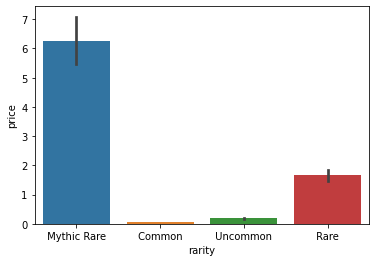

In [138]:
sns.barplot(x=df.rarity, y = df.price)

Show how prices of cards have changed over time.

<AxesSubplot:xlabel='setNum', ylabel='price'>

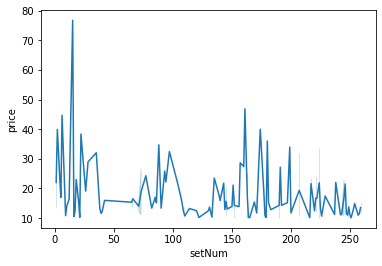

In [ ]:
money = df[df.price >= 10]
sns.lineplot(x=money.setNum, y = money.price)

What is the highest priced card? How much is it? What set is it from?

In [ ]:
highest = df[df.price == df.price.max()]
highest

,Unnamed: 0,cardName,cardCmc,cardType,creatureType,powTough,set,setNum,rarity,language,cardImage,price,colorlessValue,pipValue,manaValue,color
1699,1699,"Ulamog, the Ceaseless Hunger",10,Legendary Creature,Eldrazi,10/10,Battle for Zendikar (BFZ),15,Mythic Rare,English,https://c1.scryfall.com/file/scryfall-cards/la...,76.79,10,0,10,C
